<div align="right">Python 3.6 Jupyter Notebook</div>

# Predictive modeling using Bandicoot features
<br>
<div class="alert alert-warning">
<b>Note that this notebook contains advanced exercises that are only applicable to students who wish to deepen their understanding and qualify for bonus marks on this course. </b>You will be able to achieve 100% for this notebook by completing Exercises 1 to 4. An optional, additional exercise (Exercise 5) can be completed to qualify for bonus marks.
</div>

### Your completion of the notebook exercises will be graded based on your ability to do the following: 

> **Understand**: Do your pseudo-code and comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets? 

> **Analyze**: Are you able to pick the relevant method or library to resolve specific stated questions?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**:  Are you able to produce notebooks that serve as computational records of a session that can be used to share your insights with others?

#### Notebook objectives
By the end of this notebook, you will be expected to:

> - Understand what machine learning is;
- Explain the bias-variance trade-off;
- Fit different models to data that you have collected; and
- Interpret binary classification model results using confusion matrices and receiver operating characteristic (ROC) curves.
 
####  List of exercises:
>   - **Exercise 1:** Machine learning concepts.
  - **Exercise 2:** Simple ROC curve interpretation.
  - **Exercise 3:** Interpreting results of binary classification model.
  - **Exercise 4:** Analysis of ROC curves and general model improvement strategies.
  - **Exercise 5 [Advanced]:**  Building a $k$ nearest neighbor classification model.

# Notebook introduction
This notebook serves as a brief introduction to the exciting field of machine learning, and provides you with hands-on examples of the various steps you are likely to perform. You will use a number of Python libraries, introduced in earlier modules, to generate features and compute behavioral indicators.

> **Note**:

> Although a lot of the terms introduced in this notebook will be new to many students, these terms will make more sense once you have worked through the notebook.

The approach followed in this notebook entails computing a number of behavioral indicators and defining the target variable, before going back to steps that were introduced in previous modules (such as performing exploratory data analysis and preprocessing data). In this notebook, a section on classification with cross validation is followed by one that looks at the receiver operation characteristic (ROC) curve. In the final section, choosing optimal classifier parameters is discussed.

# 1. Introduction to machine learning
In Module 4, you evaluated more than 1,400 behavioral indicators for many users in the “Friends and Family” data set. The next logical question to ask is: can you do something useful with these indicators and how can you process or make sense of so many variables or features? The short answer is, without the help of computers, it is virtually impossible. Thanks to machine learning, you can extract answers to meaningful questions using such vast amounts of data. Examples of questions that may be of interest include the following:
- What is a person's gender?
- How susceptible are they to marketing?
- Are there patterns in the data that suggest a higher probability that the person will not be making use of our service?
- What is their propensity for taking up a new product or service offering?
- Who is best positioned to assist them should they engage with our organization through any one of our channels?
- How do their usage patterns inform product design and development?
- Which members in a community are most at risk in an epidemic or disease outbreak?

The huge excitement behind big data is around the opportunities that it provides, and the fact that, as recently as a decade or two ago, they could not have been imagined. Developments in machine learning and statistics provide the capacity to do something intelligent with data, and extract useful knowledge. Major corporations from the computer and internet industry (such as Google, Apple, Amazon, and Microsoft) are hedging their bets on this potential, and driving a lot of innovation for a new era of technological changes. 
Eric Schmidt, the chairman of Alphabet, recently stated that the wide adoption of machine learning in computing will “create huge new platforms, companies, IPOs, wealth, and enormous things going on in the future” (Williams, 2016).

### 1.1 What is machine learning?

The SAS institute (2016) [defines machine learning](http://www.sas.com/en_us/insights/analytics/machine-learning.html) as “a method of data analysis that automates analytical model building. Using algorithms that iteratively learn from data, machine learning allows computers to find hidden insights without being explicitly programmed where to look.” 
There are two main classes of machine learning algorithms.

#### 1.1.1 Unsupervised learning

In *unsupervised learning*, the objective is to identify or infer a function to describe a hidden structure or similarity of patterns in unlabeled data. In Module 4, you were introduced to three different methods that can be used for clustering and community detection in graph networks, namely hierarchical clustering, modularity maximization, and spectral graph partitioning. These methods belong to the unsupervised learning family of machine learning algorithms.

#### 1.1.2 Supervised learning
In *supervised learning*, which is the focus of this notebook, not only are you provided with a set of features ( $ {X}_i$, for $i=1,...,N$) but also a set of labels ${y}_i, i=1,...,N$, where each $y_i$ is a label corresponding to $X_i$. The set of features is also referred to as predictors, and the labels as response, or target variables. For example, you have already been introduced to the very rich set of features one can derive from mobile phone metadata. Basic demographic or socioeconomic information (such as the economic status of an individual, or their gender or age) is typically missing from these data sets. If such information is available for a subset of the population in the database, an interesting challenge, with broad policy implications, is to use mobile phone data to predict these demographic indicators where such information is unavailable or not easily accessible. Read about the use of [mobile phones in global development](https://www.devex.com/news/can-mobile-phone-data-answer-global-development-s-call-88681), for an example of this challenge.
Thus, in supervised learning, one uses a given pair of input data and a corresponding supervisory target or desired target, $(y,X)$ to learn a function $f$ that can be used to predict the unknown target value of some input vector, as follows:
$$ y = f(X).$$


Typically, one collects data of known $(y, X)$ pairs that hopefully capture the range of variability and associated outcomes for the domain problem at hand. Learning a function $f$ essentially involves capturing statistical regularities from systems that are potentially very complex and high-dimensional. The learned function $f$ is usually a complicated mathematical expression that describes the data, for example, the behavior of an economically-disadvantaged person from a specific country as observed through their telephone activity.


Traditional approaches to understanding nature have largely focused on finding a theory or law that describes observed measurements. These laws often take an understandable mathematical form, for example, Newton's laws of motion or Einstein's relativity theory. Understanding nature is then based on reasoning with these laws. Unfortunately, for a large class of problems that are of interest to society (such as those mentioned above), abstracting these problems into a comprehensible mathematical form is a difficult undertaking, as they are often complex, and require measurements of a large number of quantities over a reasonable period of time. Machine learning allows us to discover and make predictions about these systems using large volumes of data. However, for many of these cases, the traditional scientific goal of finding a simple mathematical description becomes elusive as the output of a learning algorithm is a complicated mathematical expression. Therefore, some of these machine learning systems are described or used as “black boxes” – the derived models are not explainable, and people often only care about their predictions.
The learning process also uses specified objective functions to optimize when fitting the data. A simple example of an objective function is the sum of squares error formula (used in linear regression) with which you may be familiar. In machine learning, the error term itself is usually referred to as the [loss function](http://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing), and the performance of a given algorithm is commonly reported in terms of the loss function employed. A number of these will be discussed later in the notebook.


### 1.2 Model fitting

Exactly what does learning entail? At its most basic level, learning involves specifying a model $f$ that can hopefully extract regularities for the data or problem at hand, as well as the appropriate objective function to optimize using a specified loss function. Learning (or fitting) the model essentially means finding optimal parameters of the model structure, using provided input or target data. This is also called training the model. It is common (and best practice) to split the provided data into at least two sets – training and test data sets. The rationale for this split is that you are fitting the model to perform as well as it can using given or seen data. However, your primary goal is for the model to perform well on unseen data. That is, data that you still have to collect, with labels ($y$) that you do not know. To manage this challenge, you will keep part of the collected data hidden from the training or fitting process. Once you are satisfied that you have an optimal model, you can then assess how well the model generalizes on unseen data, using the data that was hidden from the training process. Data used to fit the model is referred to as training data, and data kept hidden from the training – but used to assess the generalization performance of the model – is called test data. There are different variations of this train-and-test split. You may also encounter the term “validation data” being used for essentially the same objective, except for some technicalities that go beyond the scope of this course. The three main reasons why you should evaluate the predictive performance of a model are the following:

1. **Model evaluation:** Estimate the predictive performance of our model on unseen data, which is its generalization performance.
- **Model selection:** Assist in tuning the learning algorithm parameters and selecting the best-performing model from a given class.
- **Algorithm selection:** Identify the most appropriate learning algorithm for the modeling problem on hand.

The difference between model selection and algorithm selection is that selecting an algorithm defines the family of models from within which you can choose an optimal model (model selection). Choosing a different learning algorithm instantiates a different space from within which you will need to select the best-performing model. As a simple example, a linear algorithm implies linear models. You can then pick the best-performing linear model, given the data. Alternatively, choosing a nonlinear algorithm means that you have a more flexible class of models at your disposal. You will need to tune the nonlinear algorithm parameters in order to choose the best-performing model, given the data.


### 1.3 Bias-variance trade-off

Model and algorithm selection are closely related to the bias-variance trade-off in machine learning and statistics. Bias arises when the statistically-expected model prediction differs from the true value or target (over the training data), and tends to be influenced by model selection. To get an estimate of the expected model prediction, it is common to resample the data and repeat the model-building process. A high prevalence of bias means that these average prediction values are substantially different from the true value. Variance, on the other hand, measures the consistency of the predictions across different training sets, not whether or not they are accurate.

If your model has low variance and high bias, it will *underfit*, and if it has high variance and low bias it will *overfit*. Selecting a linear model to approximate an underlying nonlinear function introduces a bias, which is due to the linear model’s inability to capture the nonlinearity, resulting in underfitting. On the other hand, selecting a nonlinear model to a estimate an underlying linear function introduces a bias that results in the nonlinear model overfitting. The bias-variance trade-off implies selecting a learning algorithm with low bias, and yet is flexible enough to fit the data well. Too much flexibility in the learning algorithm introduces high variance as the algorithm will always fit each training data set differently. In other words, increasing the bias will decrease the variance, and increasing the variance will decrease the bias. Most of your efforts in the model training process will be around managing this trade-off.

The bias-variance trade-off can also be seen through insights from many great philosophers and scientists, in various forms. For example, this can be seen in a quote often attributed to Albert Einstein, which says, "Everything should be as simple as it can be, but not simpler,” as well as another quote, attributed to William of Ockham, which says, "More things should not be used than are necessary." With respect to application of machine learning in the real world, the following remark by a renowned applied machine learning researcher and practioner is worth noting.

> It takes surprisingly long time to grok bias and variance deeply, but people that understand bias and variance deeply are often able to drive very rapid progress. 
<br> <br>
<div align="right"> (Andrew Ng, * Tutorial - Nuts and Bolts of Building Applications using Deep Learning, NIPS 2016.*) </div>

The interplay between bias and variance can be visualized using a [bulls-eye diagram](http://scott.fortmann-roe.com/docs/BiasVariance.html). In this representation, the bull's eye at the center of the target is the ground truth, and any deviation from this is an incorrect prediction (model error). Multiple models are built (using different samples from the training data), and the resulting performance of each model is represented by a hit on the board. The scatter in the hits arises from the random variability in the training data (introduced via the resampling). In the plot below are four cases representing different bias and variance combinations that you can expect when fitting models data. Since the truth is not known, various methods such as the learning curve are used to estimate bias in data, and its interplay with variance (Fortmann-Roe 2012).



You are encouraged to visit and read Scikit-learn’s [practical advice on machine learning](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/practical.html), with special regard to the summary section.


<img src="biasvariance.png" width=400, height=450>



In summary, predictive model-building, with machine learning, involves the following sequential steps:
1. Data collection (predictors and response)
2. Algorithm selection
3. Model selection
4. Model evaluation



### 1.4 Myths and misconceptions
Pedro Domingo, author of [*The Master Algorithm*](https://www.amazon.com/Master-Algorithm-Ultimate-Learning-Machine/dp/0465065708), penned an insightful article on a number of machine learning [myths and misconceptions](https://medium.com/@pedromdd/ten-myths-about-machine-learning-d888b48334a3#.143f0x8gq) that are worth reading to get a sense of what machine learning really is.
### 1.5 Machine learning using Python
Python has a growing set of well-developed toolkits that make it easier to perform this kind of data analysis, such as the [Scikit-Learn](http://scikit-learn.org/stable/) package (commonly referred to as sklearn), and [Mlxtend](http://rasbt.github.io/mlxtend/) (machine learning extensions), among others.

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>


### Instructions
Provide brief, written answers in markdown to demonstrate your understanding of the following:
 
> 1. What is machine learning?
> 2. Using your own words (in one or two sentences), explain what the bias-variance trade-off is.
> 3. Can a linear algorithm overfit? Justify your answer (in one or two sentences).
> 4. List two methods you can use to minimize or avoid overfitting.



> **Hint**: 
- Review [this article](http://www.ma.utexas.edu/users/mks/statmistakes/ovefitting.html) for additional information on overfitting.
- Review [this post](http://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/) for additional information on the bias-variance trade-off.
- Review Tomasz Malisiewicz's notes from Andrew Ng's NIPS tutorial on the [Nuts and Bolts of Building Deep Learning Applications](http://www.computervisionblog.com/2016/12/nuts-and-bolts-of-building-deep.html) for a suggested recipe on building machine learning systems.


#### Exercise 1 Answers
##### 1. What is machine learning?
According to SAS institute (2016) machine learning is a method of data analysis that automates analytical model building using algorithms that iteratively learn from behavioral indicators inferred from data. It permits computers to find hidden insights without being explicitly programmed where to look. 

##### 2. What is bias-variance trade-off?
Bias arises when the statistically-expected model prediction differs from the true value or target (over the training data), and tends to be influenced by model selection, while Variance measures the consistency of the predictions across different training sets, not whether or not they are accurate. The bias-variance trade-off involves finding an equilibrium between bias and variance that keeps both low and ensures analytical modeling produces the best estimate of a mapping function for an output variable given some input data. 

##### 3. Can a linear algorithm overfit?
Overfitting occurs when a model learns the training data too closely, including its noise and outliers and as a result, it performs very well on the training data but poorly on unseen data. Selecting a linear model to approximate an underlying nonlinear function introduces a bias, which is due to the linear model’s inability to capture the nonlinearity, resulting in underfitting, therefore it follows that if a linear algorithm learns the training data too closely, even if the underlying function is linear, it can overfit. 

##### 4. List two methods you can use to minimize or avoid overfitting.
* Model validation by splitting the training data sample into training, test and validation sets or using resampling methods.
* Model/algorithm selection and parameter tuning to find out which parameters minimize overfitting for the selected model/algorithm. 

### 1.6 Sample XGBoost Algorithm Parameters
XGBoost is a powerful gradient boosting machine learning library that has gained popularity due to its speed and performance. When tuning an XGBoost model, understanding its parameters is essential. These parameters can be broadly categorized into three groups:

1. **General Parameters**:
   - `booster`: The type of boosting model to use. It can be `gbtree`, `gblinear`, or `dart`.
   - `verbosity`: The degree of verbosity. Valid values are `0` (silent), `1` (warning), `2` (info), and `3` (debug).
   - `nthread`: Number of parallel threads to run XGBoost. Default is the maximum number of threads available if not set.

2. **Booster Parameters**:
   - `learning_rate` (or `eta`): It shrinks the feature weights to make the boosting process more conservative.
   - `min_child_weight`: Defines the minimum sum of weights of all observations required in a child.
   - `max_depth`: Maximum depth of a tree.
   - `max_leaf_nodes`: Maximum number of terminal nodes or leaves in a tree.
   - `gamma`: Minimum loss reduction required to make a further partition.
   - `subsample`: Proportion of training data to randomly sample in each boosting round.
   - `colsample_bytree`: Proportion of features to randomly sample for building each tree.
   - `colsample_bylevel`: Proportion of features to sample for building each level.
   - `colsample_bynode`: Proportion of features to sample for building each node.
   - `lambda` (L2 regularization term): Increase this value will make the model more conservative.
   - `alpha` (L1 regularization term): Increase this value will make the model more conservative.
   - `scale_pos_weight`: Controls the balance of positive and negative weights, useful for imbalanced classes.
   - `base_score`: The initial prediction score of all instances, global bias.

3. **Learning Task Parameters**:
   - `objective`: Specifies the learning task and the corresponding objective function (`reg:squarederror` for regression tasks, `binary:logistic` for binary classification, `multi:softprob` for multiclass classification, etc.)
   - `eval_metric`: Evaluation metric to be used for validation data (`rmse` for regression, `error` for classification, `logloss`, etc.)
   - `seed`: Random number seed to ensure reproducibility.

4. **DART Booster Specific Parameters** (when `booster=dart`):
   - `sample_type`: Type of sampling algorithm (`uniform` or `weighted`).
   - `normalize_type`: Type of normalization algorithm (`tree` or `forest`).
   - `rate_drop`: Dropout rate.
   - `skip_drop`: Probability of skipping dropout.

5. **Linear Booster Specific Parameters** (when `booster=gblinear`):
   - `lambda`: L2 regularization term on weights.
   - `alpha`: L1 regularization term on weights.
   - `updater`: The choice of optimization algorithm (`shotgun`, `coord_descent`, etc.)
   - `feature_selector`: Feature selector algorithm (`cyclic`, `shuffle`, `random`, `greedy`, `thrifty`).

It's worth noting that parameter tuning requires a good understanding of the meaning of each parameter, as well as the specific problem you're working on. Using tools like Grid Search or Random Search with Cross Validation can help in finding the optimal set of parameters for a given problem.

<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 2. Predictive modeling 

The potential for using mobile phone metadata in studying human behavior – to provide information on health, infrastructure, and economics – is now largely recognized. In developing countries, where data is scarce, data generated by mobile phones has already helped with planning disaster response, and informing public health policy. For example, there is growing interest in predicting demographic information from metadata (Jahani et al. 2015). Mobile phone data has been used to predict the distribution of the wealth of an entire nation or to infer the asset distribution of micro-regions (composed of a few households) based on inferring the socioeconomic status of individual from their past history of mobile phone use (Blumenstock et al. 2015). While this data is a gold mine, the challenge is in using the data in a way that respects and preserves people’s privacy.

In this section, you will be introduced to predictive modeling using the “Friends and Family” data set. You will use Bandicoot to generate a set of behavioral indicators that can be used as features or predictors. You will be provided with a socioeconomic status indicator to be used as the response or target variable. You will initially investigate the use of a specified learning algorithm on the data set.
> **Note:** The philosophy and mathematics underlying the models used in this notebook are important in guiding the model building process. Understanding the technicalities of these algorithms assumes prerequisites that are beyond the scope of this course.

### 2.1 Data preparation
As discussed in the previous notebook, Bandicoot allows you to analyze and extract behavioral indicators from mobile phone metadata. With Bandicoot, it is easy to load all of the users in the “Friends and Family” data set, and automatically compute their indicators.

The provided data set contains 129 users (in the study population) interacting with each other. Each CSV file contains call and text metadata records that belong to a single user.

#### Load libraries and set options

In [125]:
# Load libraries and set options.
import matplotlib.pyplot as plt
import bandicoot as bc
from tqdm import tqdm_notebook as tqdm  # Interactive progress bar.
import glob
import os
import pandas as pd
import numpy as np
from numpy.core.umath_tests import inner1d
from scipy.stats import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'

## For spectral graph partitioning.
from sklearn.cluster import spectral_clustering as spc

## Supervised learning.
from sklearn import svm, linear_model, ensemble, neighbors, tree
from sklearn import metrics, preprocessing
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import Perceptron
from mlxtend.classifier import MultiLayerPerceptron as MLP


from sklearn.feature_selection import SelectKBest, f_regression


#### 2.1.1 Create a function to load a user and return all the indicators

In [126]:
def make_features(user_id):
    '''
    Compute and return indicators of a specific user
    '''
    user = bc.read_csv(user_id, "./bandicoot-training-master/data-fnf/records/",
                       attributes_path="../data/bandicoot/attributes/subsector/",
                       describe=False, warnings=False)

    return bc.utils.all(user, summary='extended', split_day=True, split_week=True)

#### 2.1.2 Create a list of users with their features from all the CSV files 

In [127]:
# Read all the csv files in the in "./data-fnf/records" directory.
all_features = []

# Process all the files in the specified directory using the function created previously.
for f in glob.glob("./bandicoot-training-master/data-fnf/records/*.csv"):
    user_id = os.path.basename(f)[:-4]  # Remove .csv extension.
    all_features.append(make_features(user_id))
    
# Export all features in one file (fnf_features.csv).
bc.io.to_csv(all_features, 'fnf_features.csv')

Successfully exported 129 object(s) to fnf_features.csv


#### 2.1.3 Load the features and attributes to a DataFrame

In [128]:
# Load the features and attributes to a DataFrame using the Pandas library.
df = pd.read_csv('fnf_features.csv')
df.head()

,name,reporting__antennas_path,reporting__attributes_path,reporting__recharges_path,reporting__version,reporting__code_signature,reporting__groupby,reporting__split_week,reporting__split_day,reporting__start_time,...,frequent_antennas__weekend__allday__std,frequent_antennas__weekend__day__mean,frequent_antennas__weekend__day__std,frequent_antennas__weekend__night__mean,frequent_antennas__weekend__night__std,churn_rate__mean,churn_rate__std,attributes__individual_id,attributes__gender,attributes__sub
0,fa10-01-01,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-06 12:35:31,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-01,male,0.0
1,fa10-01-02,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-06 12:35:17,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-02,female,0.0
2,fa10-01-03,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-07 12:08:23,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-03,male,1.0
3,fa10-01-04,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-20 13:48:57,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-04,female,1.0
4,fa10-01-05,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-22 16:04:19,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-05,male,1.0


In [129]:
df.shape

(129, 1484)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Columns: 1484 entries, name to attributes__sub
dtypes: bool(8), float64(1445), int64(18), object(13)
memory usage: 1.5+ MB


In [131]:
df['attributes__sub'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: attributes__sub, dtype: float64

### 2.2 Defining the target variable

In many situations, it is often the case that a piece of important information is of interest and use in, for example, informing policy initiatives or understanding human behavior at scale. However, accessing this information is difficult, and you have to estimate it using other approaches. Particularly with regard to the developing world, a [data revolution research report](https://www.odi.org/sites/odi.org.uk/files/odi-assets/publications-opinion-files/9604.pdf) by the Overseas Development Institute (2015) noted that:
> "Data are not just about measuring changes, they also facilitate and catalyse that change. Of course, good quality numbers will not change people’s lives in themselves. But to target the poorest systematically, to lift and keep them out of poverty, even the most willing governments cannot efficiently deliver services if they do not know who those people are, where they live and what they need. Nor do they know where their resources will have the greatest impact."
<br> <br>
<div align="right">(Overseas Development Institute 2015)</div>

In the following example, you have been provided with a proxy indicator for socioeconomic status that can be appended to the “Friends and Family” data set. (You could also use other attributes of interest such as age or gender, as demonstrated in a study of [age and gender as seen through mobile phone usage patterns](http://arxiv.org/abs/1511.06656)).





### 2.3 Modeling objective
The modeling objective is building a model that can be used to predict the socioeconomic status of an individual using their history of mobile phone use. The socioeconomic status is a binary variable, with two possible values or classes – 0 and 1. Model fitting involves trying to find a rule (model) that can identify an individual's socioeconomic status.

### 2.4 Classification

To better understand the goal in classification, it is best to use an example. The [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris) is perhaps one of the best-known and widely-used data sets in pattern recognition and classification literature. The data set contains 3 (**Iris Setosa**, **Iris Versicolor**, **Iris Virginica**) classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other two; the latter two are not linearly separable from each other. Running the cell below gives a 2-dimensional scatterplot of the data using only the sepal features. The class information is overlayed using different colors.

> **Note:** Two-dimensional problems are widely used to illustrate fundamental concepts because they easily convey what is happening. In most problems that you will be faced with (such as the “Friends and Family” data that you will be working with in this notebook), the data is high-dimensional and cannot be visualized in the same way as can be done for the iris data, in the demonstration below.

### 2.4.1 High Dimensionality
High-dimensional data refers to datasets that have a large number of features (or attributes) relative to the number of observations. The challenge with high-dimensional data in machine learning, often termed the "curse of dimensionality," includes:
Overfitting: With many features and not enough samples, models can become overly complex and fit to the noise rather than the underlying trend. This means they perform poorly on unseen data.

- **Computational Complexity**: Processing and analyzing high-dimensional data can be computationally intensive and time-consuming.

- **Data Sparsity**: As dimensionality increases, the volume of the space increases so rapidly that the available data become sparse. This sparsity makes clustering and nearest neighbor searches less meaningful.

- **Decreased Model Performance**: Algorithms that rely on distance calculations (like k-means or k-nearest neighbors) can suffer in performance as distances in high-dimensional spaces tend to converge.

- **Decreased Interpretability**: The more features a dataset has, the harder it can be to visualize and interpret.

To address these challenges, various techniques like dimensionality reduction (e.g., PCA, t-SNE), feature selection, and regularization methods (e.g., L1 or L2 regularization) are employed. Regularization introduces a penalty on the magnitude of the model's parameters. This penalty discourages overly complex models which can arise due to high dimensionality. By doing so, it can reduce variance and improve the model's generalization to new data.

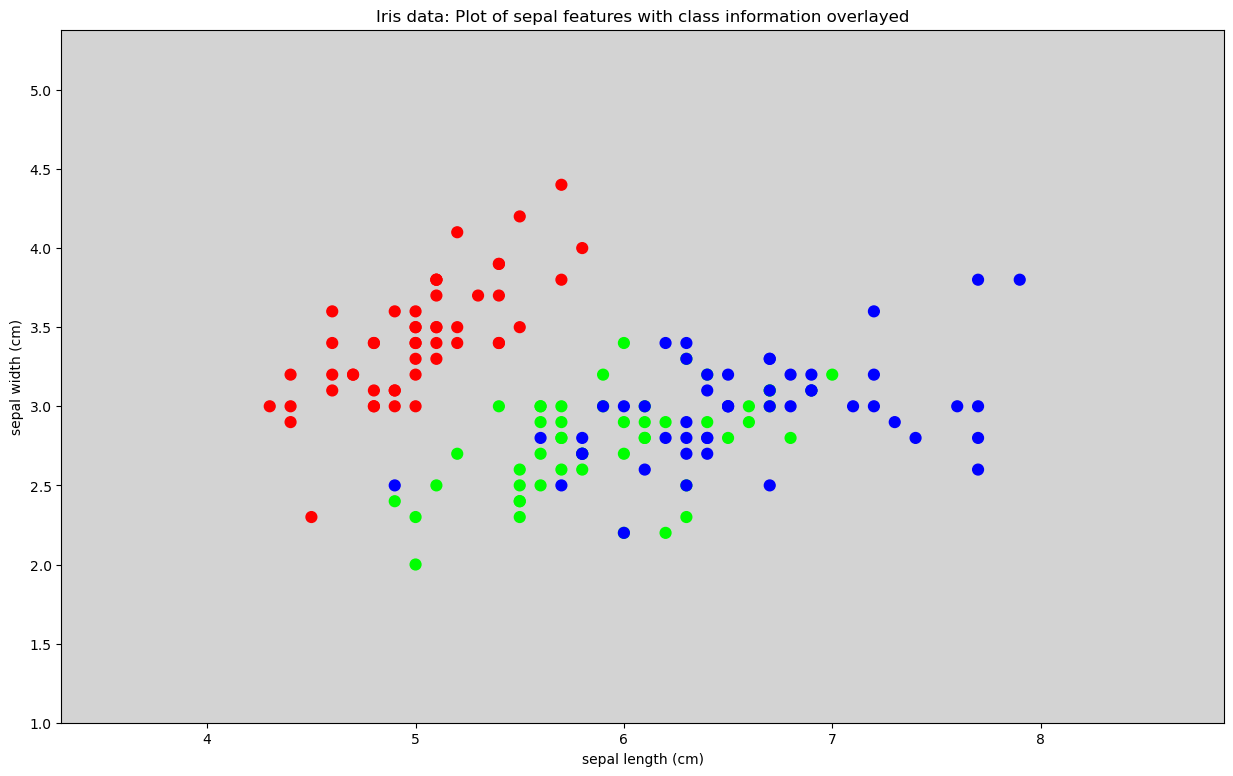

<Figure size 1500x900 with 0 Axes>

In [132]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
%run plot_iris2d.py

Given the data set plotted above, the classification objective is to build a model that can predict the class of iris plant, given the following measurements: sepal length, and sepal width (measured in centimeters). In the following, both linear and nonlinear classification models are demonstrated using these features.


     Classification DEMO

A demonstration of solving a classification problem.
It will plot the decision boundaries for each class.



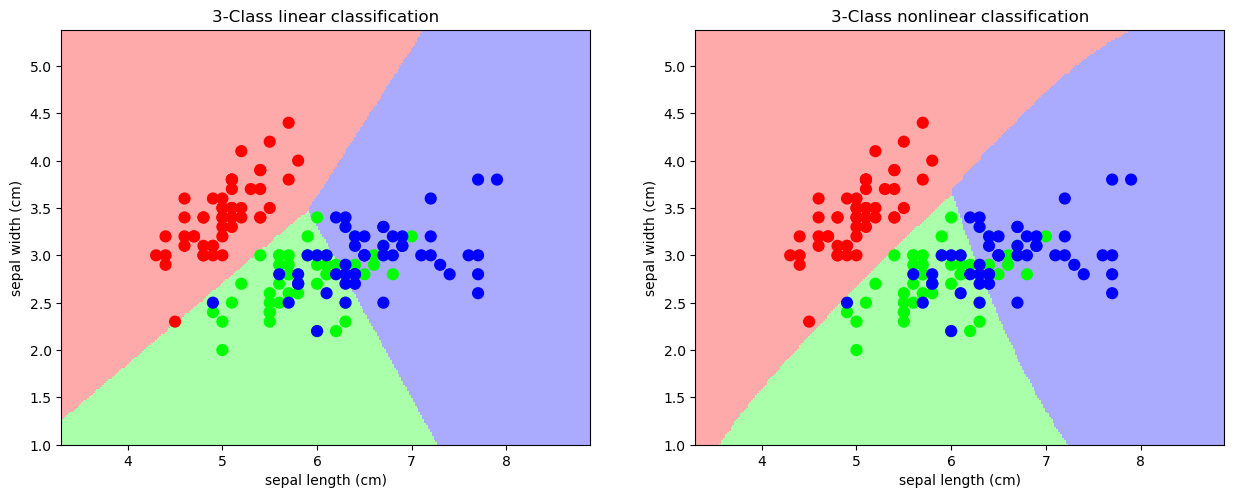

<Figure size 1500x900 with 0 Axes>

In [133]:
# A demonstration of classification using linear and nonlinear algorithms.
%run plot_classification.py

In each case (linear and nonlinear model), the resulting classification model is described by decision boundaries that separate the space into three different-colored areas, each representing the predicted class of an iris plant given features with the values on the $x$ and $y$ axes, that is

$P(\text{class } | \text{ sepal length}, \text{sepal width})$.

For the selected features, notice that one of the classes (denoted by red circles) is easily separated from the other two classes. These two groups (denoted by green and blue circles) are not easily separable – at least not without using complex models. Unfortunately, the more flexible the model class, the higher the variance, as discussed before.

To assess model performance, one approach is to compute the misclassification error (that is, number of incorrectly classified cases divided by the number of total cases in the data) for each model. The model with the lower misclassification error is then selected. In practice, the data is first split into training, validation, and test sets. Model fitting and parameter tuning is done using only the training and validation sets. The test set is used **only once** right at the end of the model fitting iteration to report the expected performance of the model on unseen data.

### 2.5 Exploratory data analysis

Exploratory data analysis (EDA) is a critical first step in any data analysis project, and is useful for the following reasons:

- Detecting errors in data;
- Validating our assumptions;
- Guide in the selection of appropriate models;
- Determining relationships among the explanatory variables; and
- Assessing the direction and size (roughly) of relationships between predictor/explanatory and response/target variables.

You have already been using a number of basic EDA tools ("df.info()" and "df.describe()") that analysts use to get a glimpse of the data they will be working with. Other useful EDA approaches include the preliminary screening of predictor variables to assess how they relate to the response variable(s). The following section demonstrates how you can explore differences in the distributions of features between the groups you are interested in.

In [134]:
# First extract the groups by target variable.
sub_gr = df.groupby('attributes__sub')
sub_gr.head()
#sub_gr.first()

,name,reporting__antennas_path,reporting__attributes_path,reporting__recharges_path,reporting__version,reporting__code_signature,reporting__groupby,reporting__split_week,reporting__split_day,reporting__start_time,...,frequent_antennas__weekend__allday__std,frequent_antennas__weekend__day__mean,frequent_antennas__weekend__day__std,frequent_antennas__weekend__night__mean,frequent_antennas__weekend__night__std,churn_rate__mean,churn_rate__std,attributes__individual_id,attributes__gender,attributes__sub
0,fa10-01-01,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-06 12:35:31,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-01,male,0.0
1,fa10-01-02,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-06 12:35:17,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-02,female,0.0
2,fa10-01-03,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-07 12:08:23,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-03,male,1.0
3,fa10-01-04,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-20 13:48:57,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-04,female,1.0
4,fa10-01-05,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-22 16:04:19,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-05,male,1.0
5,fa10-01-06,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-07 09:08:02,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-06,female,1.0
6,fa10-01-07,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-08 11:10:59,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-07,male,1.0
8,fa10-01-09,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-13 11:48:30,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-09,male,0.0
9,fa10-01-10,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-13 11:48:45,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-10,female,0.0
12,fa10-01-13,NaN,../data/bandicoot/attributes/subsector/,../data/bandicoot/attributes/subsector/,0.6.0,393d9a4492531c67c9f48116813b98e8157142be,week,True,True,2010-09-20 20:03:53,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,fa10-01-13,male,0.0


In [135]:
# Distribution of target variable by users
sub_gr[['name','attributes__sub']].head()

,name,attributes__sub
0,fa10-01-01,0.0
1,fa10-01-02,0.0
2,fa10-01-03,1.0
3,fa10-01-04,1.0
4,fa10-01-05,1.0
5,fa10-01-06,1.0
6,fa10-01-07,1.0
8,fa10-01-09,0.0
9,fa10-01-10,0.0
12,fa10-01-13,0.0


#### 2.5.1 Are there any differences in the distribution of “call durations” between the two groups?

In [136]:
df.call_duration__allweek__allday__call__mean__mean.head()

0    139.12677
1    228.11054
2    113.73917
3    109.44441
4    111.93243
Name: call_duration__allweek__allday__call__mean__mean, dtype: float64

Text(0.5, 1.0, 'Segment 2')

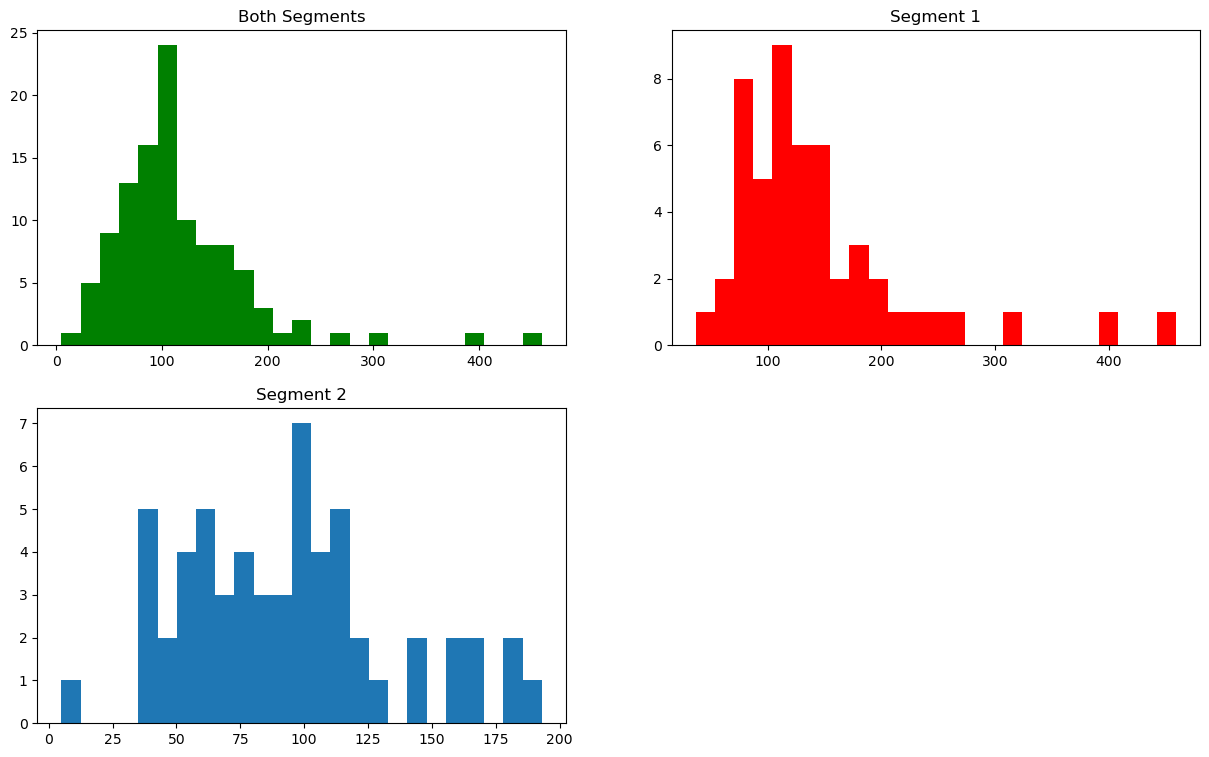

In [137]:
# Plot both segments.
plt.subplot(2,2,1)
_ = plt.hist(df['call_duration__allweek__allday__call__mean__mean'].dropna(), bins=25, color='green')
plt.title('Both Segments')

# Plot Segment 1.
plt.subplot(2,2,2)
_ = plt.hist(sub_gr.get_group(0) ['call_duration__allweek__allday__call__mean__mean'].dropna().values, bins=25, color='red')
plt.title('Segment 1')

# Plot Segment 2.
plt.subplot(2,2,3)
_ = plt.hist(sub_gr.get_group( 1)['call_duration__allweek__allday__call__mean__mean'].dropna().values,bins=25)
plt.title('Segment 2')

#### 2.5.2 Are there any differences in the distribution of the number of interactions between the two groups?

Text(0.5, 1.0, 'Segment 2')

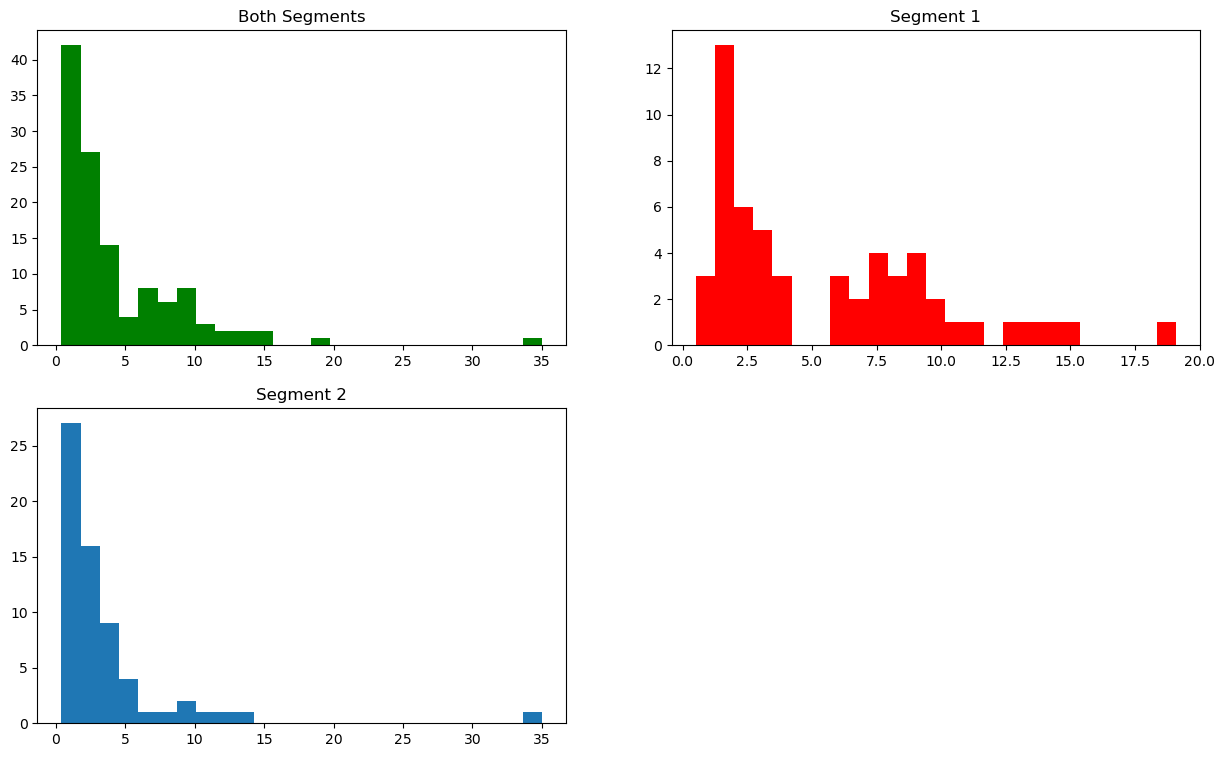

In [138]:
# Plot both segments.
plt.subplot(2,2,1)
#df['call_duration__allweek__allday__call__mean__mean'].hist(bins=100)
_ = plt.hist(df['number_of_interaction_in__allweek__night__text__mean'].dropna(), bins=25, color='green')
plt.title('Both Segments')

# Plot Segment 1.
plt.subplot(2,2,2)
_ = plt.hist(sub_gr.get_group(0)['number_of_interaction_in__allweek__night__text__mean'].dropna().values, bins=25, color='red')
plt.title('Segment 1')

# Plot Segment 2.
plt.subplot(2,2,3)
_ = plt.hist(sub_gr.get_group(1)['number_of_interaction_in__allweek__night__text__mean'].dropna().values,bins=25)
plt.title('Segment 2')

## 2.6 Data preprocessing

In order to make use of the machine learning tools, the data needs to be preprocessed. This involves a number of activities such as:
- Assigning numerical values to categorical data;
- Handling missing values; and
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).
>**Note:** Small scales imply big value. For example, assume you are classifying people based on their physiological characteristics. A small-scale feature would be height (measured in meters) compared to weight (measured in kilograms).

First, filter the data set to only return records that have a non-null label. The target variable is a socioeconomic binary indicator that is in the column labeled "df.attributes__sub".

#### 2.6.1 Drop records with missing label information

In [139]:
# Drop records with missing labels in the target variable.
df = df[~df.attributes__sub.isnull()]

In [140]:
# Review the target or response variable.
y = df.attributes__sub.astype(int).values
print(f"Total number of labels is {len(y)}")
y

Total number of labels is 127


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [141]:
from collections import Counter

# Assuming y is your binary target variable
y = df.attributes__sub.astype(int).values

# Count occurrences of 1's and 0's
counter = Counter(y)

count_of_zeros = counter[0]
count_of_ones = counter[1]

print(f"Count of 0's: {count_of_zeros}")
print(f"Count of 1's: {count_of_ones}")


Count of 0's: 59
Count of 1's: 68


In [142]:
counter = Counter(y)
print(counter)

Counter({1: 68, 0: 59})


#### 2.6.2 Feature transformation

In [143]:
# Call the values in column "attributes__gender"
df.attributes__gender.head()

0      male
1    female
2      male
3    female
4      male
Name: attributes__gender, dtype: object

In [144]:
# Convert gender labels to binary values (zero or one):
d = {'male': 0, 'female': 1}
df.attributes__gender.replace(d, inplace=True)


C:\Users\Pathways PC\AppData\Local\Temp\ipykernel_12692\2188646744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.attributes__gender.replace(d, inplace=True)


In [145]:
df.attributes__gender.head()

0    0
1    1
2    0
3    1
4    0
Name: attributes__gender, dtype: int64

#### 2.6.3 Drop non-informative columns

In [146]:
# Remove columns with reporting variables and attributes (that is, the first 39 and the last 2).
df = pd.concat([df[df.columns[39:-5]],df[df.columns[-3]]], axis=1)
df.head()

,active_days__allweek__allday__callandtext__mean,active_days__allweek__allday__callandtext__std,active_days__allweek__day__callandtext__mean,active_days__allweek__day__callandtext__std,active_days__allweek__night__callandtext__mean,active_days__allweek__night__callandtext__std,active_days__weekday__allday__callandtext__mean,active_days__weekday__allday__callandtext__std,active_days__weekday__day__callandtext__mean,active_days__weekday__day__callandtext__std,...,frequent_antennas__weekday__day__std,frequent_antennas__weekday__night__mean,frequent_antennas__weekday__night__std,frequent_antennas__weekend__allday__mean,frequent_antennas__weekend__allday__std,frequent_antennas__weekend__day__mean,frequent_antennas__weekend__day__std,frequent_antennas__weekend__night__mean,frequent_antennas__weekend__night__std,attributes__individual_id
0,6.52381,1.13888,6.39024,0.82279,5.45238,1.46714,4.69048,0.91256,4.70732,0.77283,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,fa10-01-01
1,5.88889,1.71558,5.53333,1.69444,3.90476,1.42778,4.37778,1.25236,4.28889,1.25826,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,fa10-01-02
2,4.88636,2.23826,4.61364,2.27852,3.36111,1.96006,3.76190,1.50886,3.63415,1.55792,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,fa10-01-03
3,4.53333,2.06128,4.26667,2.12812,3.07407,1.92307,3.44828,1.45238,3.27586,1.43591,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,fa10-01-04
4,5.30556,1.79226,4.97222,1.84821,3.29032,1.72633,4.02857,1.15846,3.80000,1.23751,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,fa10-01-05


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 128
Columns: 1441 entries, active_days__allweek__allday__callandtext__mean to attributes__individual_id
dtypes: float64(1440), object(1)
memory usage: 1.4+ MB


In [148]:
# Identify features with constant values, or contain only missing values.
numeric_cols = df.select_dtypes(include=['number'])
to_drop = (numeric_cols.std().isnull()) | (abs(numeric_cols.std()) < 1e-6)

In [149]:
# Keep only the columns with variability.
to_keep = np.where(~to_drop.values)[0]
df = df.iloc[:,to_keep]

In [150]:
df.head()

,active_days__allweek__allday__callandtext__mean,active_days__allweek__allday__callandtext__std,active_days__allweek__day__callandtext__mean,active_days__allweek__day__callandtext__std,active_days__allweek__night__callandtext__mean,active_days__allweek__night__callandtext__std,active_days__weekday__allday__callandtext__mean,active_days__weekday__allday__callandtext__std,active_days__weekday__day__callandtext__mean,active_days__weekday__day__callandtext__std,...,number_of_interaction_out__weekend__allday__text__mean,number_of_interaction_out__weekend__allday__text__std,number_of_interaction_out__weekend__day__call__mean,number_of_interaction_out__weekend__day__call__std,number_of_interaction_out__weekend__day__text__mean,number_of_interaction_out__weekend__day__text__std,number_of_interaction_out__weekend__night__call__mean,number_of_interaction_out__weekend__night__call__std,number_of_interaction_out__weekend__night__text__mean,number_of_interaction_out__weekend__night__text__std
0,6.52381,1.13888,6.39024,0.82279,5.45238,1.46714,4.69048,0.91256,4.70732,0.77283,...,11.87500,10.01795,8.36842,5.97548,8.87179,8.40994,3.43750,3.31604,3.68571,3.96248
1,5.88889,1.71558,5.53333,1.69444,3.90476,1.42778,4.37778,1.25236,4.28889,1.25826,...,7.81081,8.14675,2.47059,2.03261,5.35294,6.15430,1.61538,0.92308,4.28000,6.18721
2,4.88636,2.23826,4.61364,2.27852,3.36111,1.96006,3.76190,1.50886,3.63415,1.55792,...,0.41176,0.59988,4.10714,3.86689,0.25000,0.55902,3.00000,3.98609,0.50000,0.50000
3,4.53333,2.06128,4.26667,2.12812,3.07407,1.92307,3.44828,1.45238,3.27586,1.43591,...,8.60000,6.15955,6.50000,4.17333,6.44444,5.15560,2.27273,1.28565,4.66667,3.42377
4,5.30556,1.79226,4.97222,1.84821,3.29032,1.72633,4.02857,1.15846,3.80000,1.23751,...,5.55172,4.16543,6.00000,5.00000,4.10714,3.45728,3.00000,0.00000,2.42105,2.20802


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 128
Columns: 1326 entries, active_days__allweek__allday__callandtext__mean to number_of_interaction_out__weekend__night__text__std
dtypes: float64(1326)
memory usage: 1.3 MB


In [152]:
# Assign predictors to a variable of ndarray (matrix) type .
X = df.values
X[:10]

array([[6.52381, 1.13888, 6.39024, ..., 3.31604, 3.68571, 3.96248],
       [5.88889, 1.71558, 5.53333, ..., 0.92308, 4.28   , 6.18721],
       [4.88636, 2.23826, 4.61364, ..., 3.98609, 0.5    , 0.5    ],
       ...,
       [4.52632, 1.90203, 4.05263, ..., 1.27775, 2.75   , 1.29904],
       [3.2    , 1.72047, 3.07143, ...,     nan, 2.     , 0.     ],
       [3.75   , 1.92029, 3.5    , ...,     nan, 0.     , 0.     ]])

In [153]:
# Check the class of array
type(X)

numpy.ndarray

In [154]:
# Display number of dimensions and items in the array (matrix)
# A 2-dimensional array of size 127 x 1326.
X.shape

(127, 1326)

In [155]:
# Display data type in the array (matrix)
X.dtype

dtype('float64')

#### 2.6.4 Imputing missing values

Data collected from experiments often contains missing values. Unfortunately, missing values can reduce the number of usable records for model building. In many cases, however, imputing the missing values can give better results than discarding affected samples. The effect of imputing missing values on model performance needs to be validated, because sometimes dropping affected rows can be more effective.
A number of strategies are available for imputing. With Scikit-Learn, missing values can be replaced by the mean, the median or the most frequent value. In the following, you will replace missing values using the mean of the valid values for that field. 

In [161]:
# Impute the missing values using the mean values of the respective features.
#imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(X)
#X = imp.transform(X)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [162]:
X[:10]

array([[6.52381  , 1.13888  , 6.39024  , ..., 3.31604  , 3.68571  ,
        3.96248  ],
       [5.88889  , 1.71558  , 5.53333  , ..., 0.92308  , 4.28     ,
        6.18721  ],
       [4.88636  , 2.23826  , 4.61364  , ..., 3.98609  , 0.5      ,
        0.5      ],
       ...,
       [4.52632  , 1.90203  , 4.05263  , ..., 1.27775  , 2.75     ,
        1.29904  ],
       [3.2      , 1.72047  , 3.07143  , ..., 1.7430219, 2.       ,
        0.       ],
       [3.75     , 1.92029  , 3.5      , ..., 1.7430219, 0.       ,
        0.       ]])

In [163]:
X.shape

(127, 1326)

These two sets of the data ($X$ and $y$) are then used to build the classifier, and contain the following information:
> The array y contains the labels you want to predict, representing the socioeconomic status of a person as 0 or 1. These labels are sometimes referred to as “Class 0” and “Class 1” in this notebook. The matrix X contains the features for all of the users (one column for one feature, and one line for one user).

#### 2.6.5 Normalization
Normalize the data to center it around zero and transform it to a similiar scale to prevent variables in "small" units (and therefore high values) to dominate the classification unreasonably.

In [159]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler = preprocessing.StandardScaler()
Xs = scaler.fit_transform(X)

In [160]:
Xs[:10]

array([[ 1.66941561e+00, -9.40828900e-01,  1.85195405e+00, ...,
         1.28631035e+00,  1.10803054e+00,  7.95245674e-01],
       [ 1.21402984e+00,  8.03596598e-02,  1.20951279e+00, ...,
        -6.70494359e-01,  1.44858815e+00,  1.62107379e+00],
       [ 4.94981929e-01,  1.00589258e+00,  5.20004199e-01, ...,
         1.83423301e+00, -7.17539096e-01, -4.90039888e-01],
       ...,
       [ 2.36749248e-01,  4.10515039e-01,  9.94046337e-02, ...,
        -3.80468647e-01,  5.71822362e-01, -1.93433243e-01],
       [-7.14531636e-01,  8.90186022e-02, -6.36219141e-01, ...,
        -1.81573419e-16,  1.42035209e-01, -6.75641764e-01],
       [-3.20053315e-01,  4.42848840e-01, -3.14912291e-01, ...,
        -1.81573419e-16, -1.00406386e+00, -6.75641764e-01]])